In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("C:\Guvi_projects\sensor_data.csv")

In [6]:
df.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    1000 non-null   datetime64[ns]
 1   Boiler Name  1000 non-null   object        
 2   Temperature  1000 non-null   float64       
 3   Anomaly      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
df.isnull().sum()

Timestamp      0
Boiler Name    0
Temperature    0
Anomaly        0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    1000 non-null   datetime64[ns]
 1   Boiler Name  1000 non-null   object        
 2   Temperature  1000 non-null   float64       
 3   Anomaly      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


In [25]:
df["Anomaly"].unique()

array([0, 1], dtype=int64)

In [26]:
df["Boiler Name"].unique()

array(['Boiler A', 'Boiler C', 'Boiler D', 'Boiler B'], dtype=object)

In [27]:
#Visualization

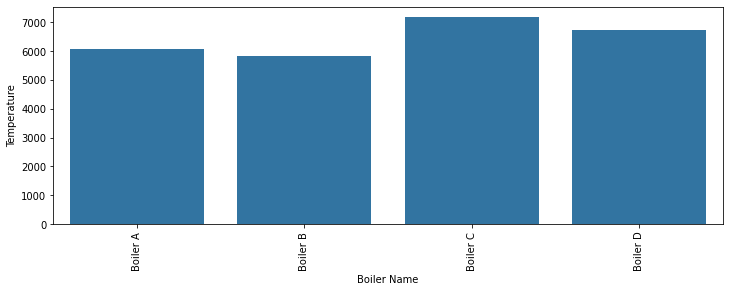

In [28]:
plt.figure(figsize=(12,4))
a = df.groupby('Boiler Name')['Temperature'].sum()
a = pd.DataFrame(a)
sns.barplot(data=a,x=a.index,y='Temperature')
plt.xticks(rotation=90)
plt.show()

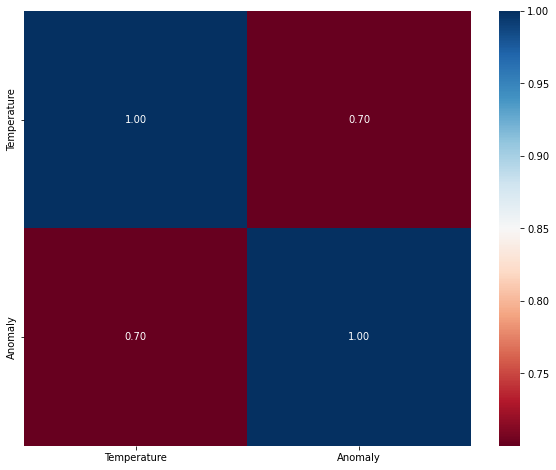

In [29]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdBu', fmt=".2f")
plt.show()

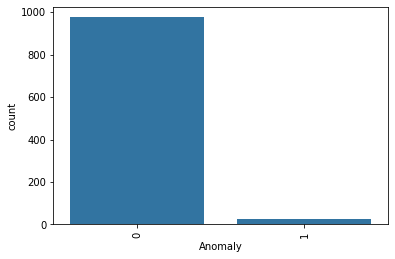

In [30]:
sns.countplot(df, x='Anomaly')
plt.xticks(rotation=90)
plt.show()

In [31]:
df.Anomaly.value_counts()

Anomaly
0    976
1     24
Name: count, dtype: int64

In [32]:
data = df.copy()

In [33]:
data.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


In [60]:
x = data[["Temperature"]]
y = data["Anomaly"]

In [63]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your problem
model.fit(x_train)

IsolationForest(contamination=0.05)

In [68]:
# Make predictions on the test set
predictions = model.predict(x_test)

In [69]:
# Convert predictions to binary (1 for anomaly, -1 for normal)
predictions_binary = [1 if pred == -1 else 0 for pred in predictions]

In [73]:
# Evaluate the model
print(classification_report(y_test, predictions_binary))
print(confusion_matrix(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       199
           1       0.25      1.00      0.40         1

    accuracy                           0.98       200
   macro avg       0.62      0.99      0.70       200
weighted avg       1.00      0.98      0.99       200

[[196   3]
 [  0   1]]


In [74]:
# Print the accuracy score
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.985
